In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle 

import itertools

import numpy as np
import pandas as pd

from sklearn.preprocessing import KBinsDiscretizer as kbd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from modules.utils.general_utils.utilities import group_wise_binning
from modules.utils.general_utils.visualizers import visualize_neurons_function

In [3]:
def sns_styleset():
    sns.set(context='paper', style='ticks', font='DejaVu Sans')
    matplotlib.rcParams['figure.dpi']        = 100
    matplotlib.rcParams['axes.linewidth']    = 1
    matplotlib.rcParams['xtick.major.width'] = 1
    matplotlib.rcParams['ytick.major.width'] = 1
    matplotlib.rcParams['xtick.major.size']  = 3
    matplotlib.rcParams['ytick.major.size']  = 3
    matplotlib.rcParams['xtick.minor.size']  = 2
    matplotlib.rcParams['ytick.minor.size']  = 2
    matplotlib.rcParams['font.size']         = 13
    matplotlib.rcParams['axes.titlesize']    = 13
    matplotlib.rcParams['axes.labelsize']    = 13
    matplotlib.rcParams['legend.fontsize']   = 13
    matplotlib.rcParams['xtick.labelsize']   = 13
    matplotlib.rcParams['ytick.labelsize']   = 13
    
sns_styleset()
cmap = matplotlib.cm.get_cmap('Paired')

### 1 - Load Globals

In [4]:
SNAPSHOTS = 10
TARGETS = [
    'tar_sessions',
    'tar_delta_sessions',    
    'tar_active_time',
    'tar_session_time',
    'tar_activity'
]
TARGETS_RMP = {
    'tar_delta_sessions': 'Future Absence',    
    'tar_active_time': 'Future Active Time',
    'tar_session_time': 'Future Session Time',
    'tar_activity': 'Future Session Activity',
    'tar_sessions': 'Future N° Sessions'
}

with open('results\\saved_objects\\mappers\\context.pkl', 'rb') as pickle_file:
    CONTEXT_RMP = pickle.load(pickle_file) 
CONTEXT_RMP = {value: key for key, value in CONTEXT_RMP.items()}

### 2 - Load Data Container

In [5]:
with (open('results\\saved_data_containers\\melchior.pkl', 'rb')) as container:
    data_container = pickle.load(container)

In [6]:
# columns_to_drop = np.random.choice([i for i in range(96)], 86, replace=False)
# columns_to_keep = [column for column in [i for i in range(96)] if column not in columns_to_drop]

columns_to_keep = [20,28,34,41,44,50,54,56,57,72]
columns_to_drop = [column for column in [i for i in range(96)] if column not in columns_to_keep]

### 3 - Full Panel

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 21 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 50 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarni

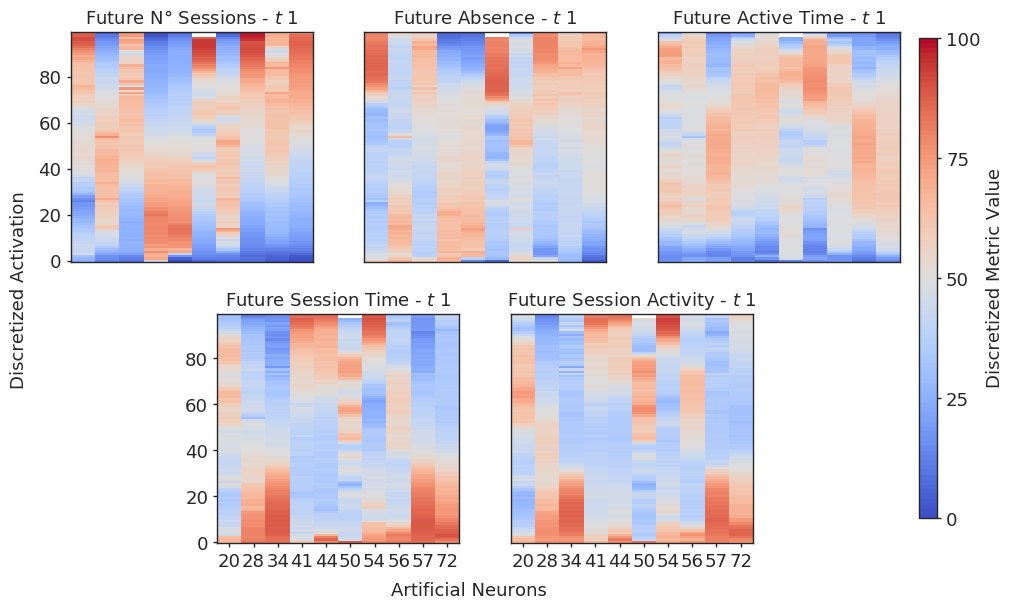

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:86: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


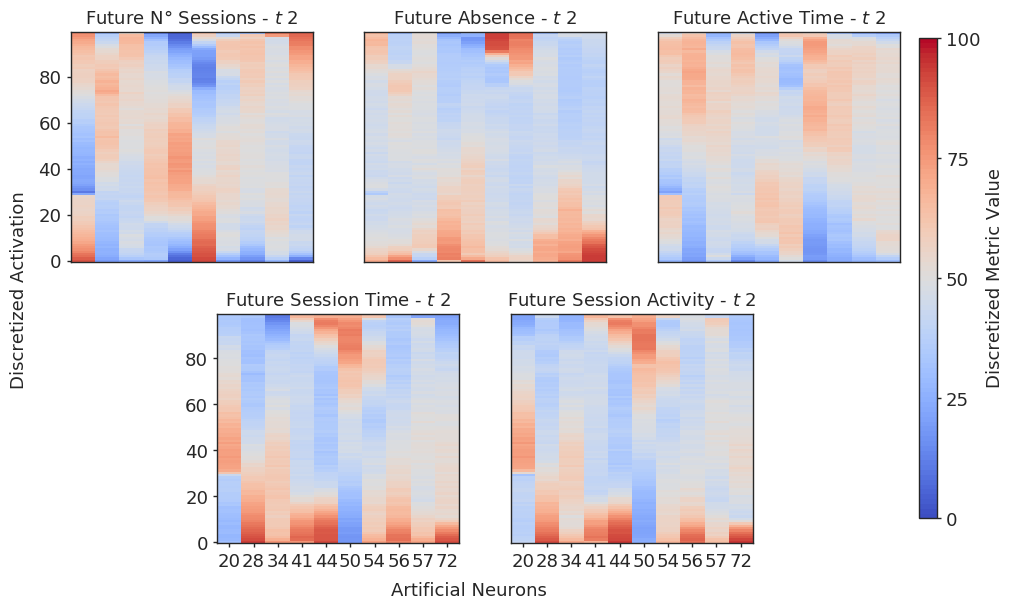

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:86: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


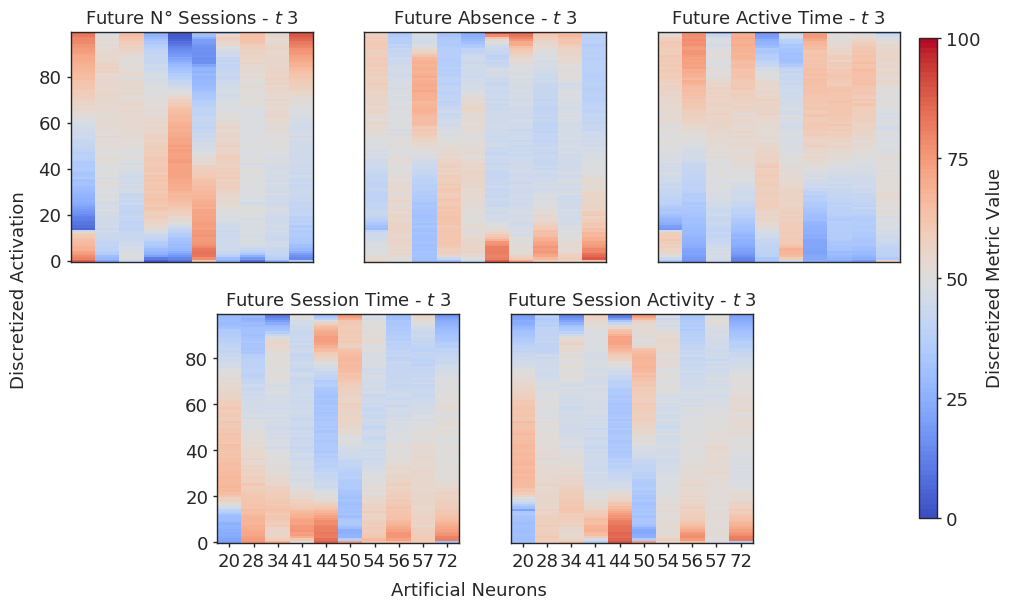

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:86: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


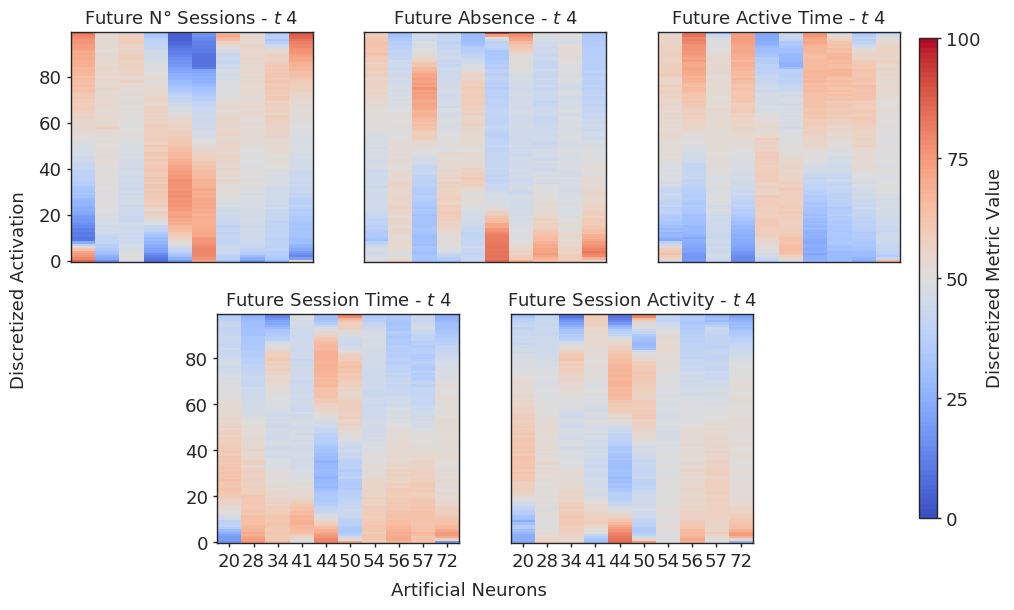

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:86: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


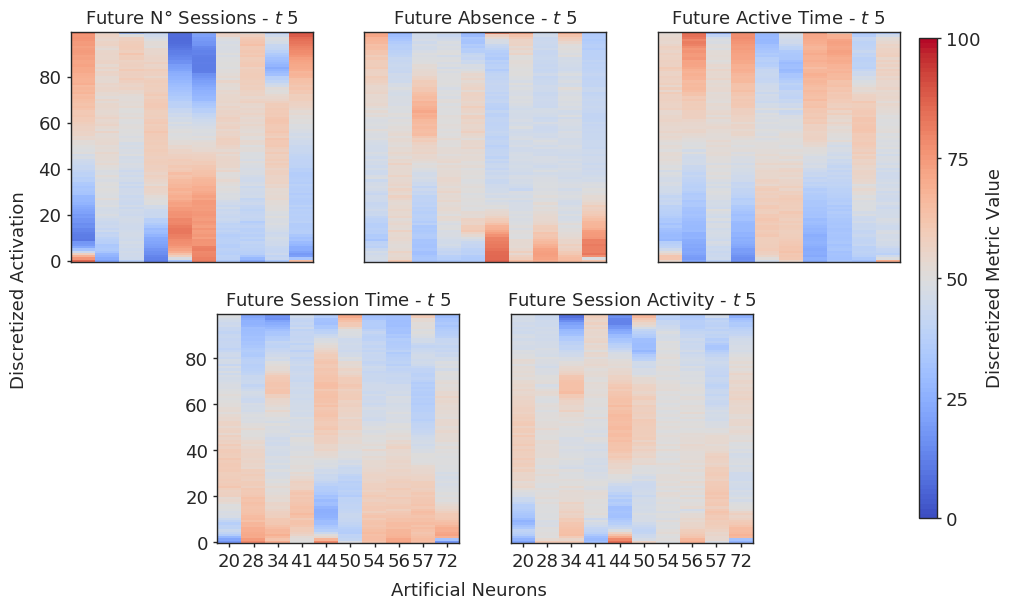

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 47 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarn

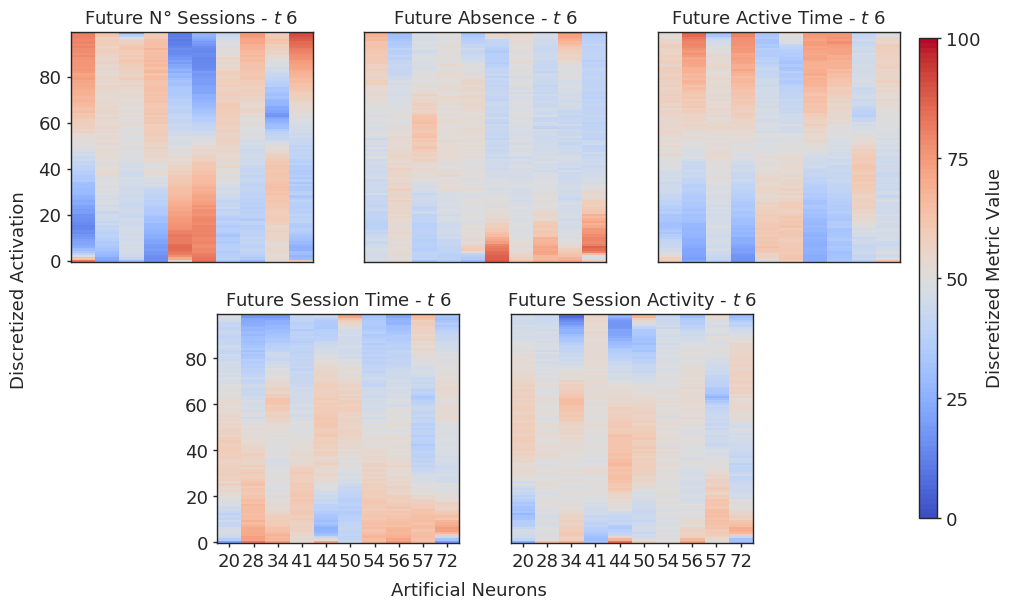

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 46 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 47 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarn

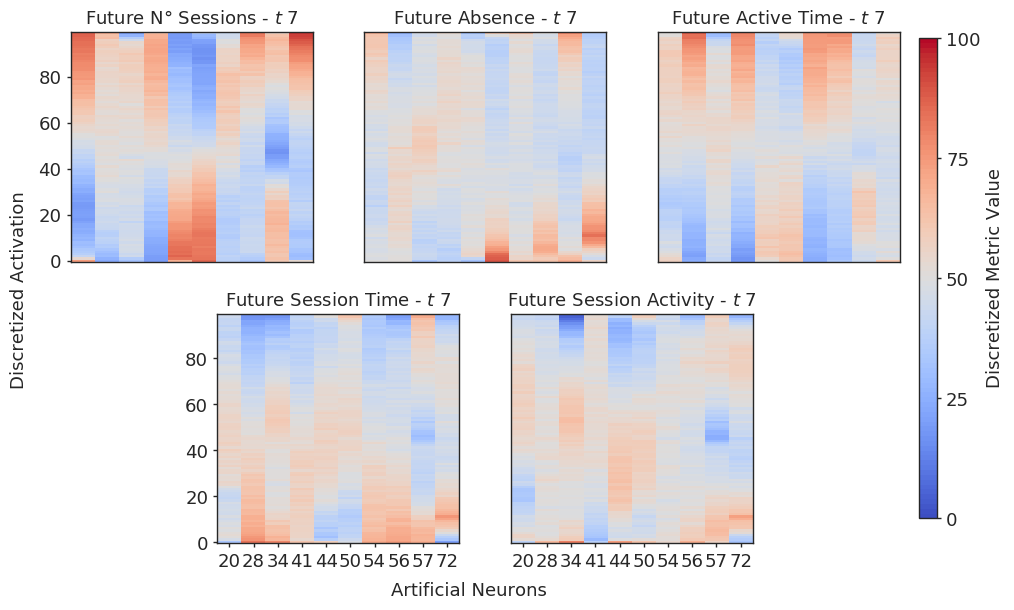

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 46 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 47 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarn

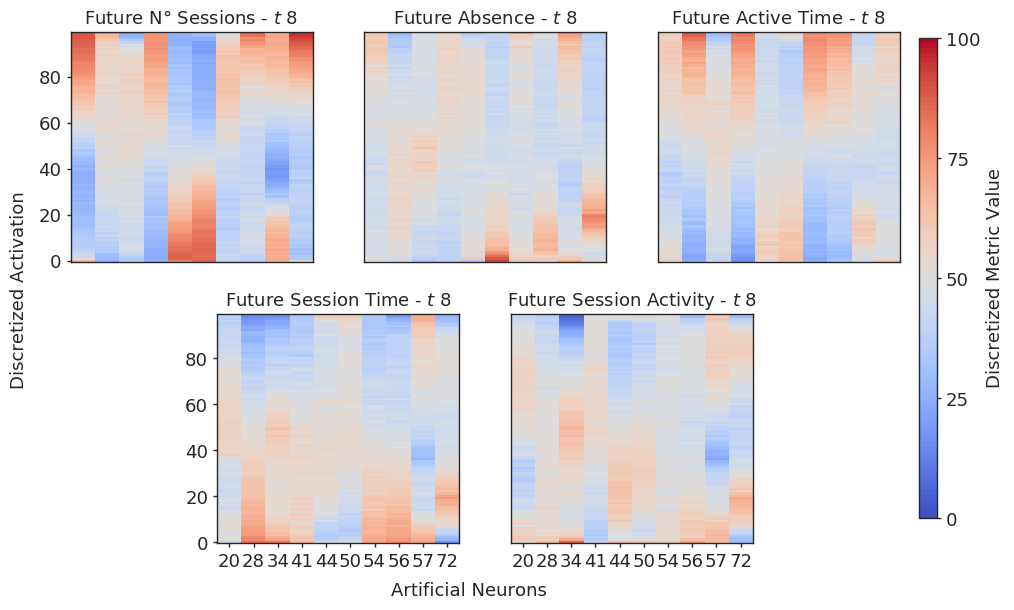

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 46 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 47 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarn

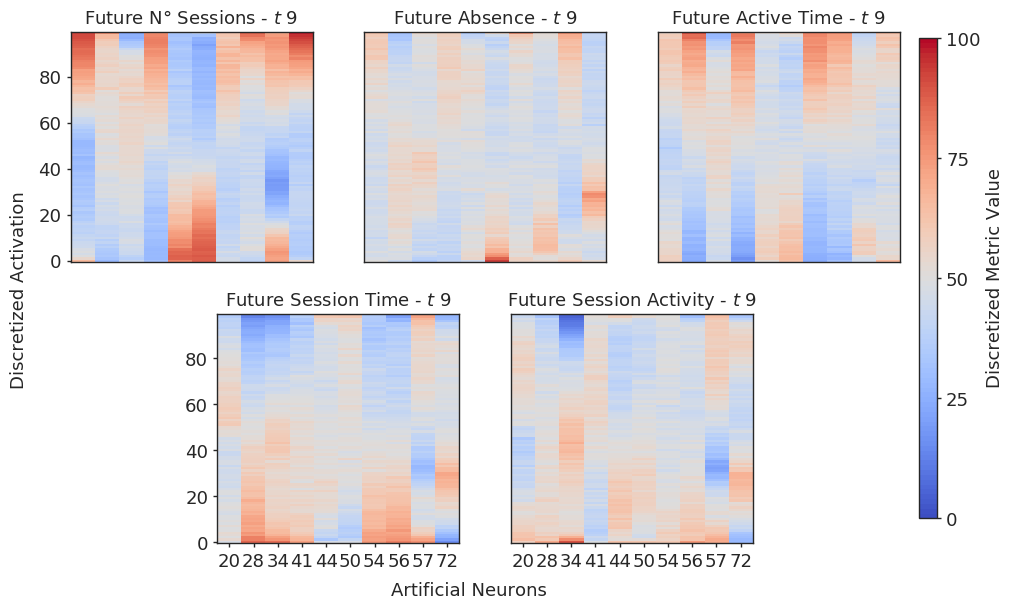

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 46 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 47 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarn

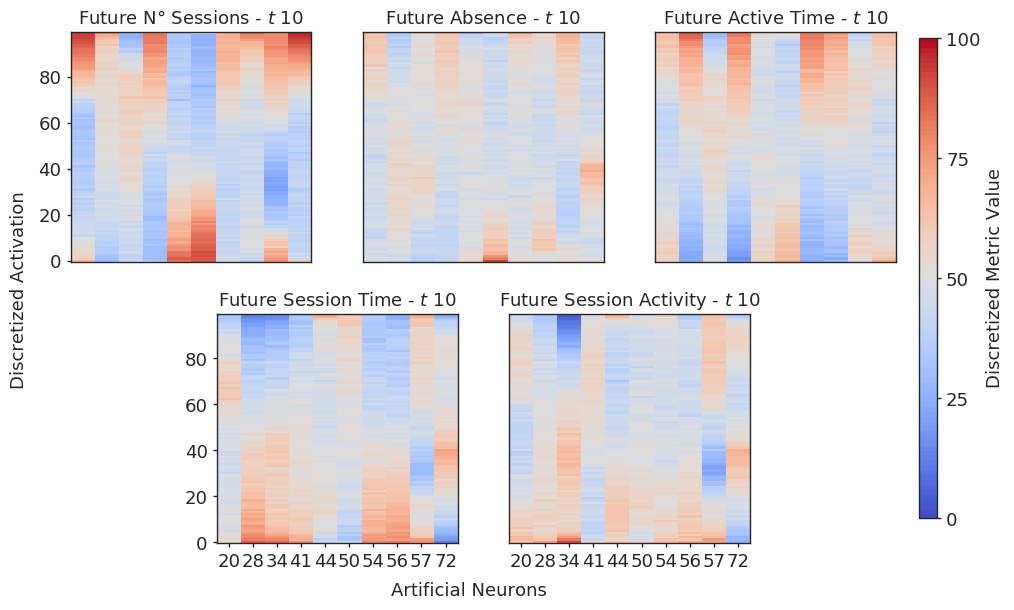

In [8]:
for snapshot in range(SNAPSHOTS):
    
    temporal_context = data_container['context'][snapshot]
    temporal_embe = np.load(f'results\\saved_emb\\melchior_eng_emb_{snapshot}.npy')
    temporal_embe = temporal_embe[~np.isnan(temporal_embe).any(axis=1)]
    
    df = pd.DataFrame(temporal_embe)
    df['context'] = temporal_context
    for target in TARGETS:
        
        df[target] = data_container['prediction_ds'][target][snapshot]
    
    df = df[df['context'] == 3]
    columns = list(df.drop(TARGETS+['context'], axis=1))
    
    df[columns] = kbd(
        n_bins=100, 
        encode='ordinal',
    ).fit_transform(df[columns].values)
    
    for target in TARGETS:
        
        color = group_wise_binning(
            array=df[target].values,
            n_bins=100,
            grouper=df['context'].values,
            method='discret',

        )
        df[target] = color
        
    melted = pd.melt(
        df, 
        id_vars=TARGETS + ['context'],
        var_name='Artificial Neurons',
        value_name='Signal'
    )

    index = 0
    fig = plt.figure(figsize=(9, 6), constrained_layout=True)
    spec = fig.add_gridspec(ncols=6, nrows=2)
    axs_metrics = [
        fig.add_subplot(spec[0, 0:2]),
        fig.add_subplot(spec[0, 2:4]),
        fig.add_subplot(spec[0, 4:]),
        fig.add_subplot(spec[1, 1:3]),
        fig.add_subplot(spec[1, 3:5])
    ]
    
    for metric, ax_metric in zip(TARGETS, axs_metrics):
   
        grouped = melted.groupby(['Signal', 'Artificial Neurons'])[metric].mean()
        grouped = grouped.reset_index().pivot('Artificial Neurons', 'Signal', metric)
        grouped = grouped.transpose()
        grouped = grouped.sort_values('Signal', ascending=True).values
        grouped = np.delete(grouped,np.s_[columns_to_drop],axis=1)

        img = ax_metric.imshow(
            grouped, 
            cmap='coolwarm',
            vmin=0,
            vmax=100,
            aspect='auto'
        )
        ax_metric.set_ylim(ax_metric.get_ylim()[::-1])

        if index == 0:
            ax_metric.set_xticks([])
        elif index == 4:
            ax_metric.set_yticks([])
            ax_metric.set_xticks([tick for tick in range(len(columns_to_keep))])
            ax_metric.set_xticklabels(columns_to_keep)
        elif index == 3:
            ax_metric.set_xticks([tick for tick in range(len(columns_to_keep))])
            ax_metric.set_xticklabels(columns_to_keep)
        else:
            ax_metric.set_xticks([])
            ax_metric.set_yticks([])

        ax_metric.set_title(f'{TARGETS_RMP[metric]} - $t$ {snapshot +1}')
        index += 1
    
    fig.text(0.5, -0.01, 'Artificial Neurons', ha='center')
    fig.text(-0.01, 0.5, 'Discretized Activation', va='center', rotation='vertical')
    
    plt.tight_layout()
    cbaxes = fig.add_axes([1.0, 0.12, 0.02, 0.80])
    cbar = fig.colorbar(
        img,
        cax=cbaxes,
        cmap='coolwarm',
        boundaries=np.linspace(0, 100, 100),
        ticks=[0, 25, 50, 75, 100]
    )
    cbar.set_label('Discretized Metric Value')
    plt.savefig(
        f'results\\figures\\embeddings\\activation_full_panel\\snaphot_{snapshot}',
        dpi=500,
        bbox_inches='tight'
    )
    plt.show()

### 4 - Temporal Panel

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarn

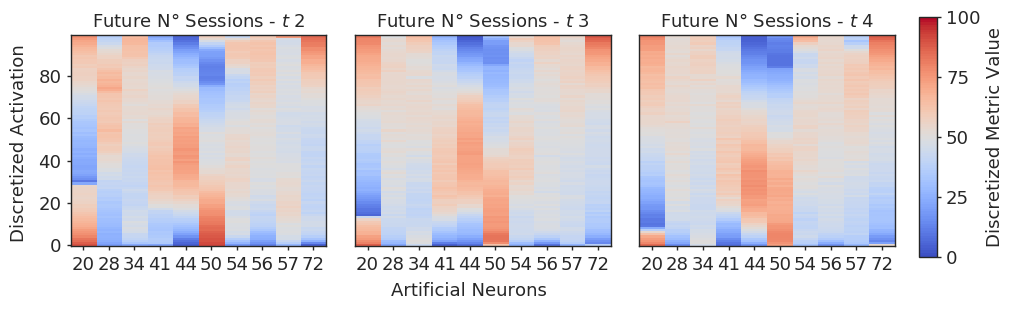

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarn

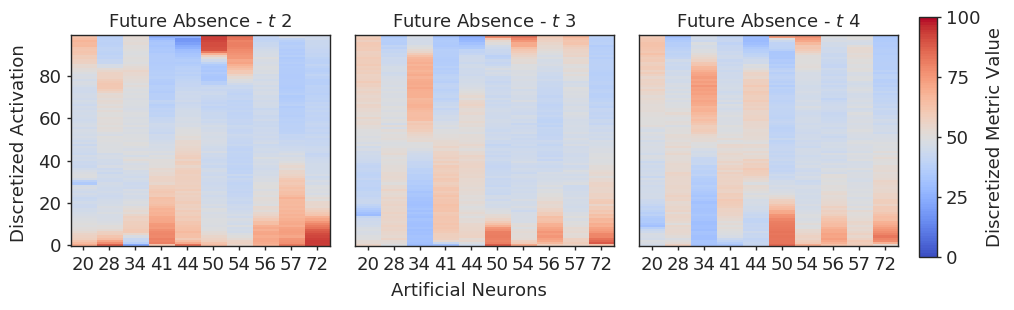

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarn

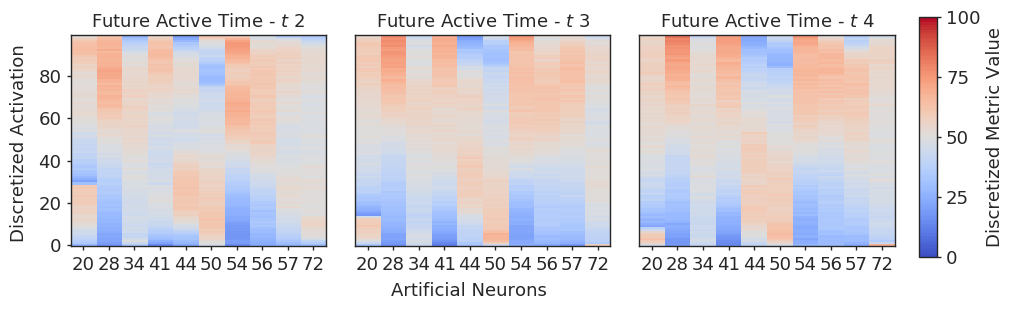

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarn

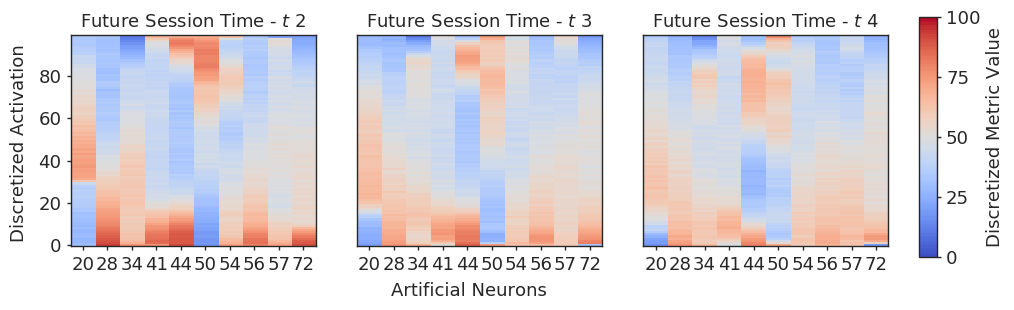

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarn

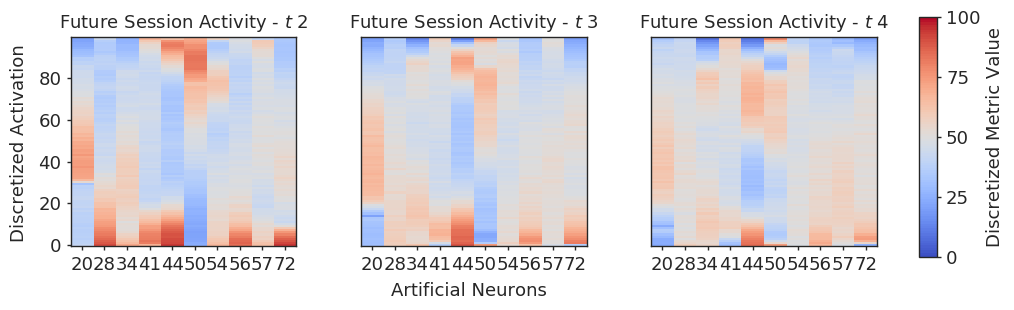

In [9]:
for metric in TARGETS:
    
    fig = plt.figure(figsize=(9, 3), constrained_layout=True)
    spec = fig.add_gridspec(ncols=3, nrows=1)
    
    for column, snapshot in enumerate([1, 2, 3]):

        temporal_context = data_container['context'][snapshot]
        temporal_embe = np.load(f'results\\saved_emb\\melchior_eng_emb_{snapshot}.npy')
        temporal_embe = temporal_embe[~np.isnan(temporal_embe).any(axis=1)]
    
        df = pd.DataFrame(temporal_embe)
        df['context'] = temporal_context
        df[metric] = data_container['prediction_ds'][metric][snapshot]
        df = df[df['context'] == 3]
        
        columns = list(df.drop([metric, 'context'], axis=1))
        color = group_wise_binning(
            array=df[metric].values,
            n_bins=100,
            grouper=df['context'].values,
            method='discret'
        )
        df[metric] = color

        columns = list(df.drop(['context', metric], axis=1))
        df[columns] = kbd(
            n_bins=100, 
            encode='ordinal',
        ).fit_transform(df[columns].values)
        
        melted = pd.melt(
            df, 
            id_vars=[metric, 'context'],
            var_name='Artificial Neurons',
            value_name='Signal'
        )
        
        grouped = melted.groupby(['Signal', 'Artificial Neurons'])[metric].mean()
        grouped = grouped.reset_index().pivot('Artificial Neurons', 'Signal', metric)
        grouped = grouped.transpose()
        grouped = grouped.sort_values('Signal', ascending=True).values
        grouped = np.delete(grouped,np.s_[columns_to_drop],axis=1)
        ax_metric = fig.add_subplot(spec[0, column])
        img = ax_metric.imshow(
            grouped, 
            cmap='coolwarm',
            vmin=0,
            vmax=100,
            aspect='auto'
        )
        ax_metric.set_ylim(ax_metric.get_ylim()[::-1])

        if column > 0:
            ax_metric.set_yticks([])
        ax_metric.set_xticks([tick for tick in range(len(columns_to_keep))])
        ax_metric.set_xticklabels(columns_to_keep)

        ax_metric.set_title(f'{TARGETS_RMP[metric]} - $t$ {snapshot+1}')
    
    fig.text(0.5, -0.01, 'Artificial Neurons', ha='center')
    fig.text(-0.01, 0.5, 'Discretized Activation', va='center', rotation='vertical')

    plt.tight_layout()
    cbaxes = fig.add_axes([1.0, 0.12, 0.02, 0.80])
    cbar = fig.colorbar(
        img,
        cax=cbaxes,
        cmap='coolwarm',
        boundaries=np.linspace(0, 100, 100),
        ticks=[0, 25, 50, 75, 100]
    )
    cbar.set_label('Discretized Metric Value')
    plt.savefig(
        f'results\\figures\\embeddings\\activation_temporal_panel\\{TARGETS_RMP[metric]}',
        dpi=500,
        bbox_inches='tight'
    )
    plt.show()
    plt.close()

### 5 - Neurons Functions

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 21 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 50 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarni

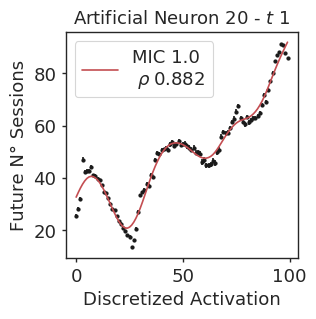

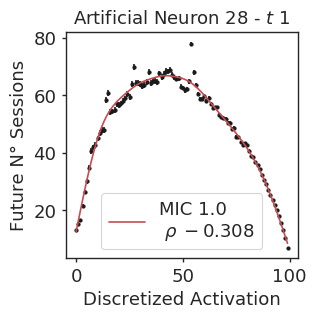

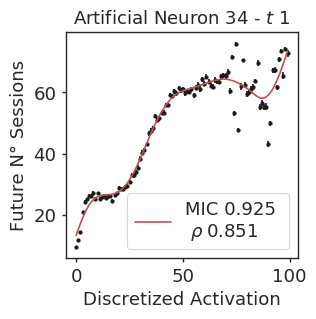

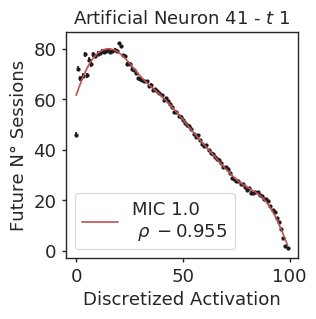

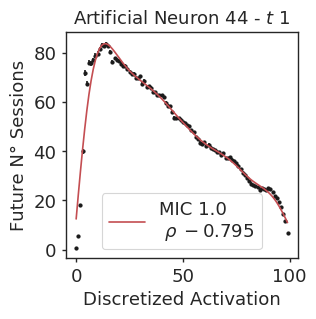

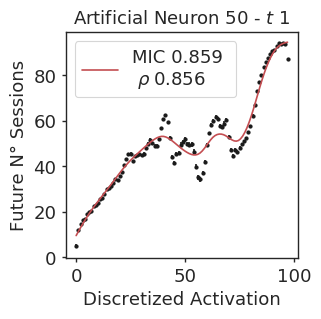

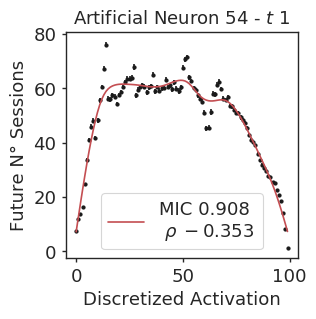

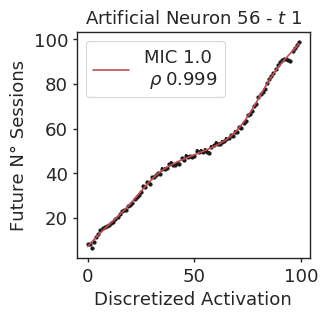

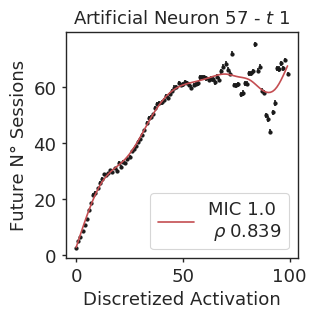

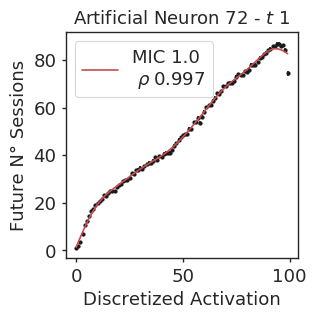

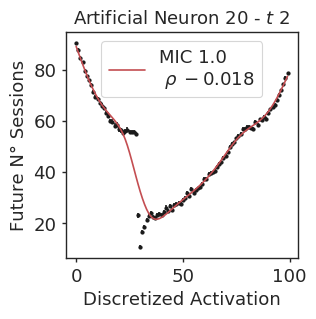

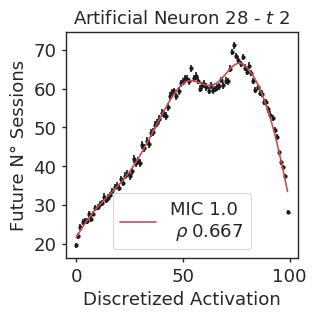

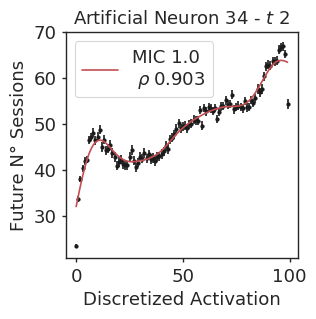

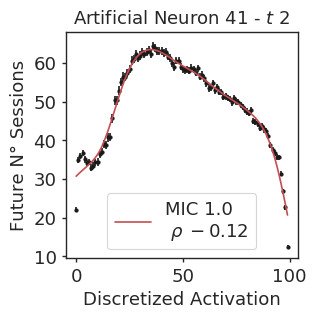

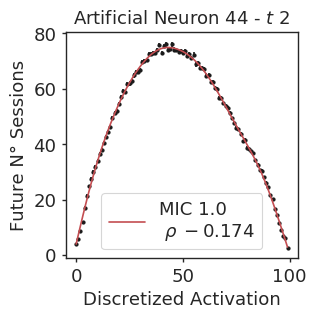

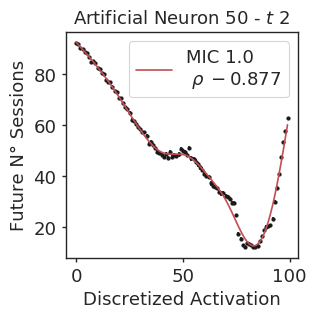

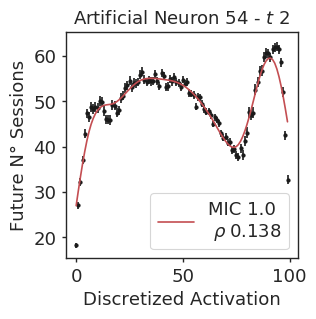

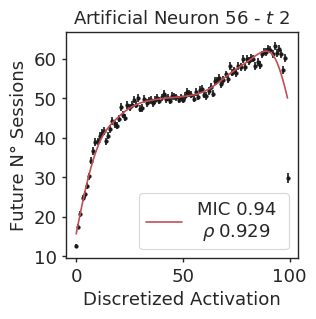

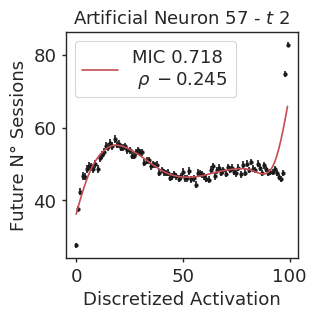

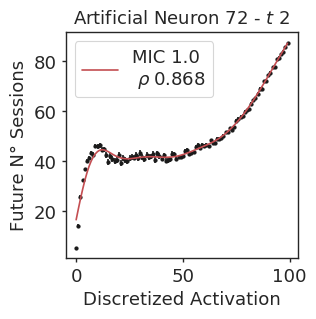

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


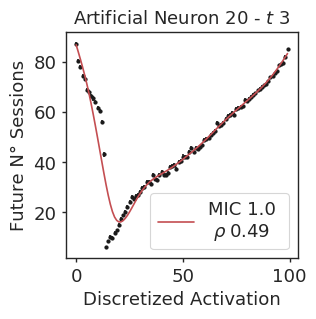

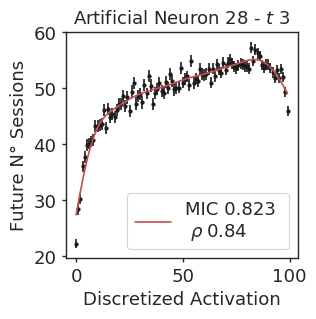

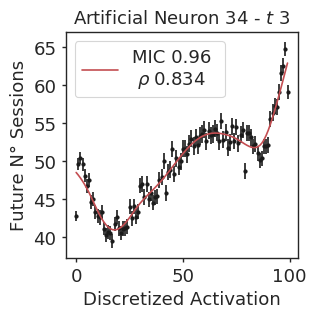

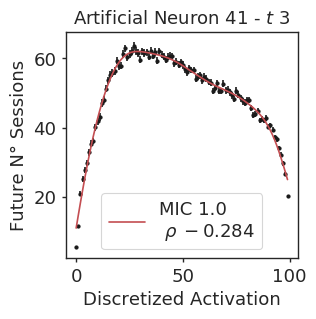

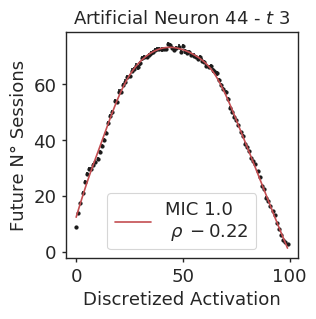

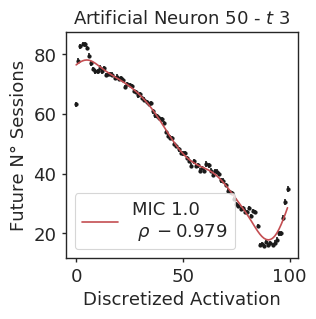

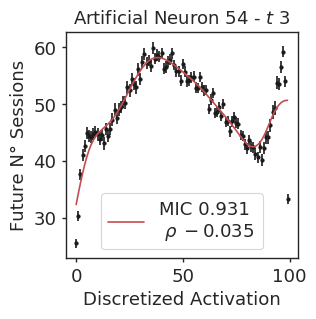

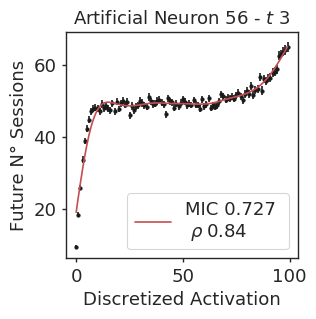

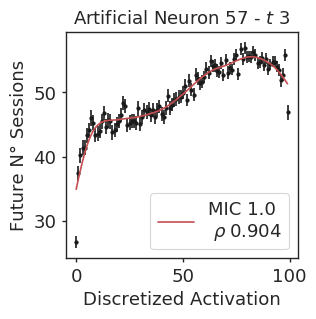

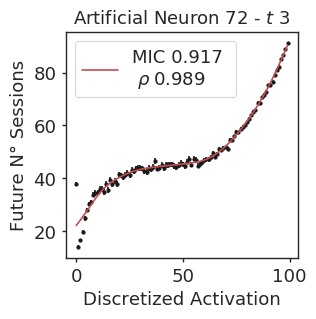

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


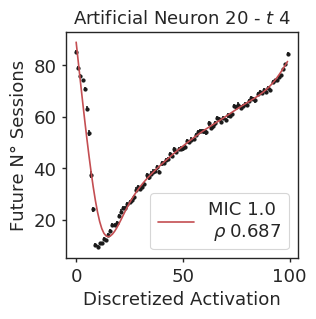

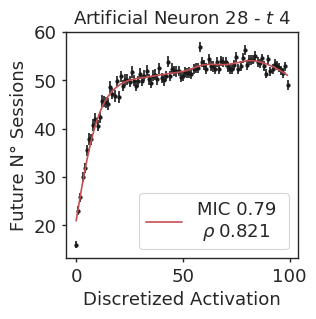

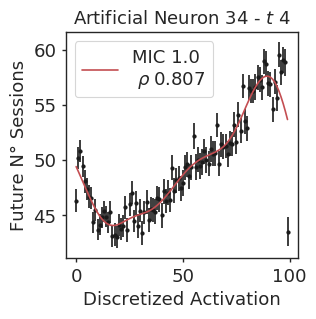

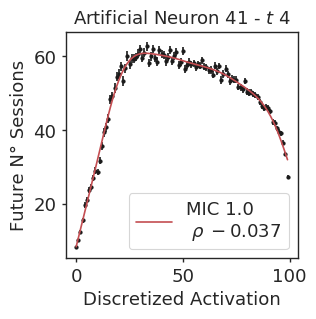

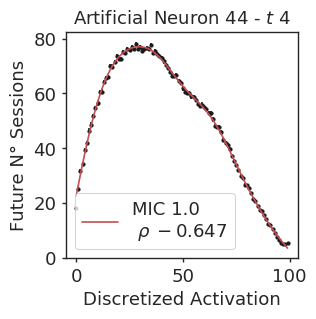

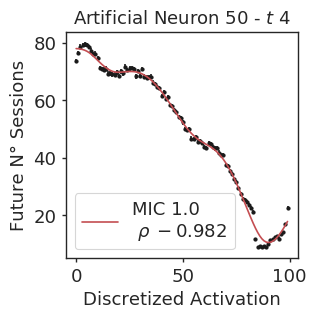

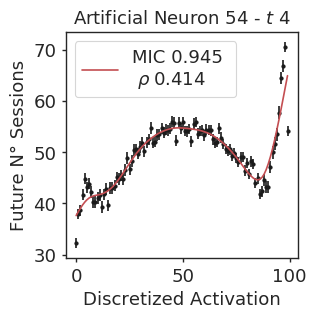

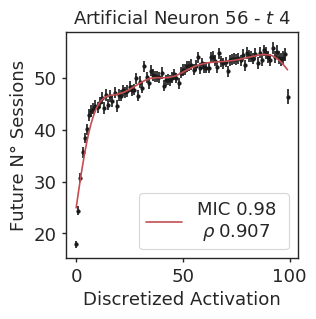

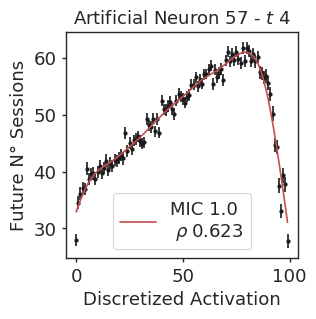

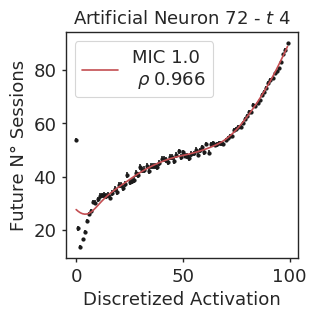

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 21 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 50 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarni

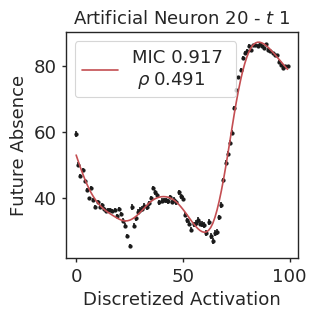

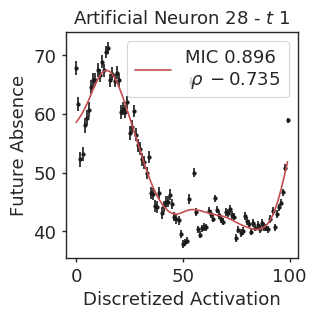

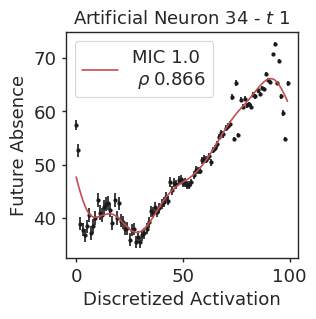

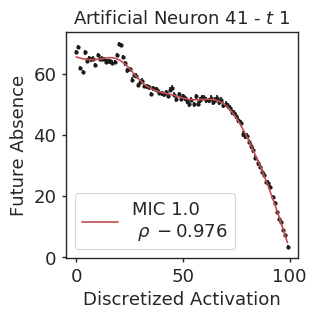

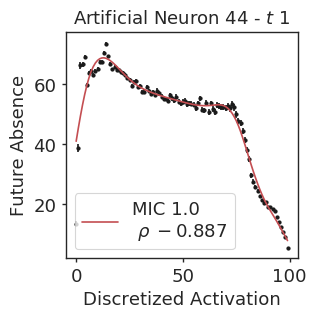

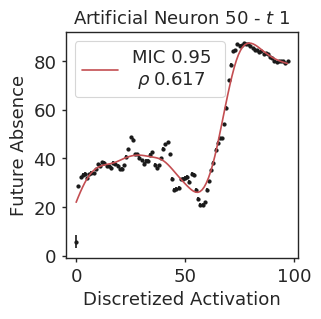

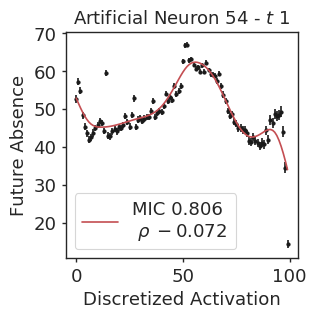

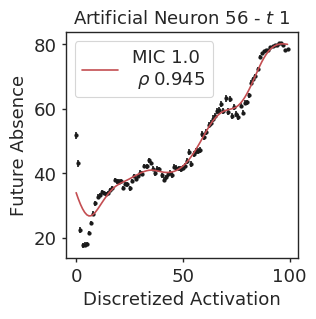

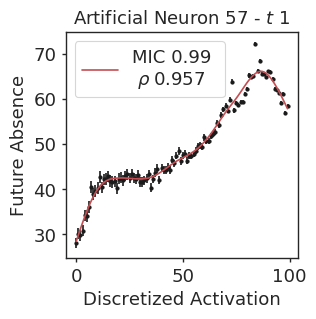

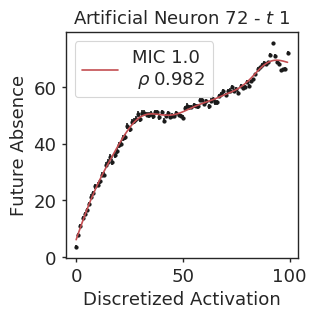

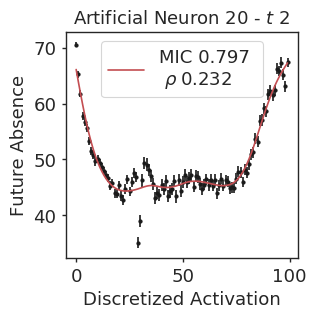

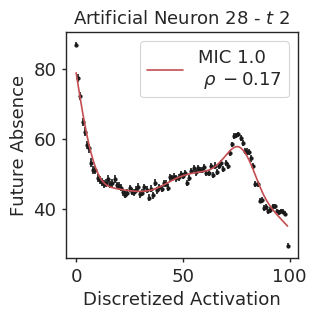

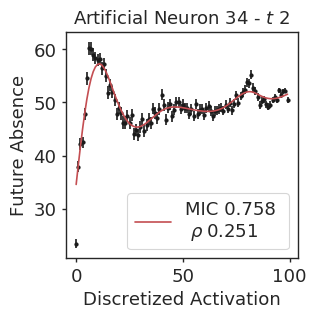

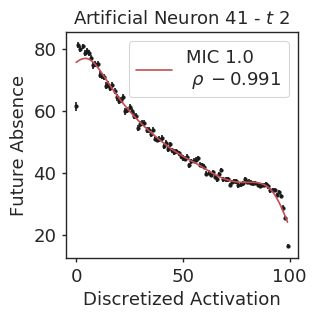

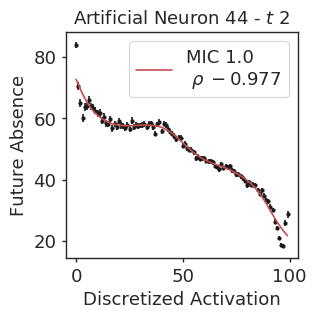

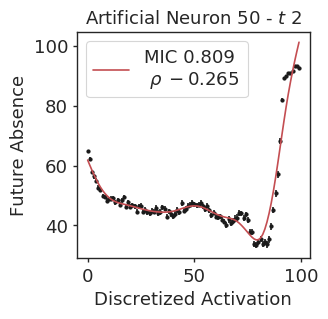

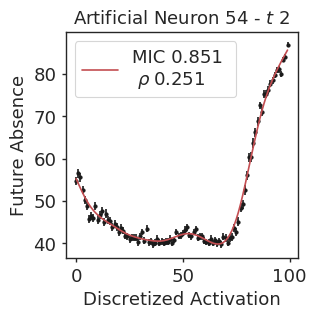

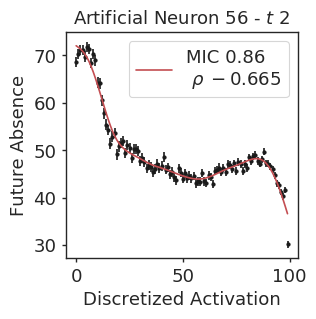

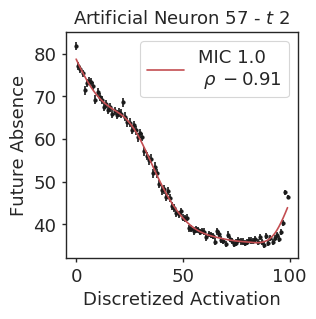

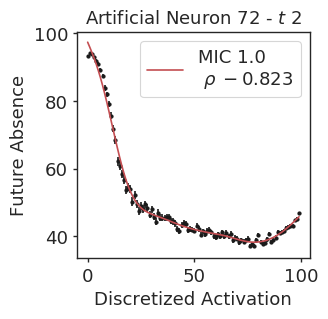

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


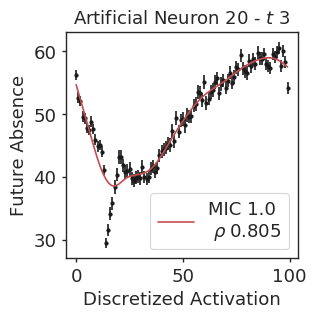

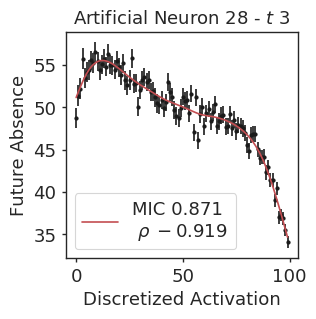

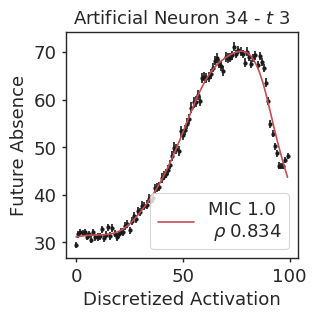

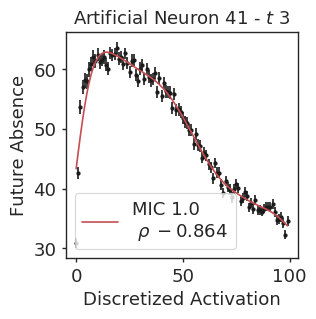

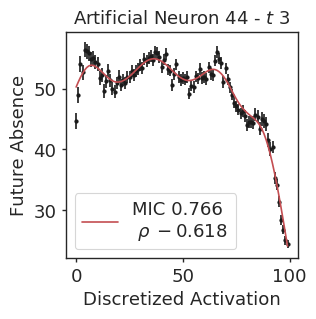

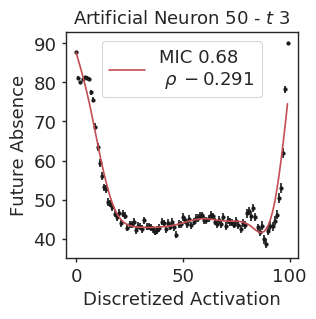

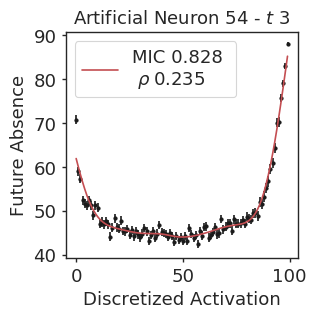

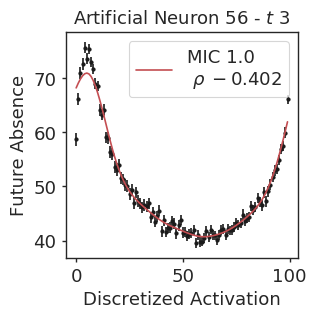

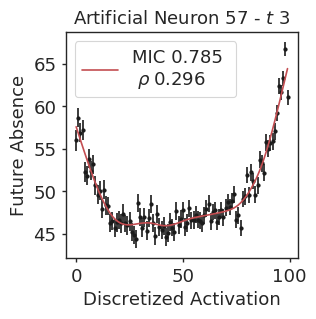

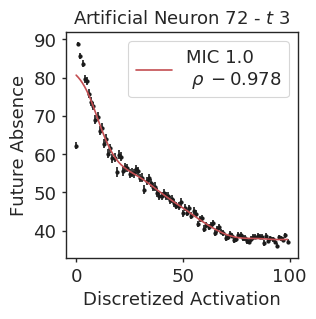

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


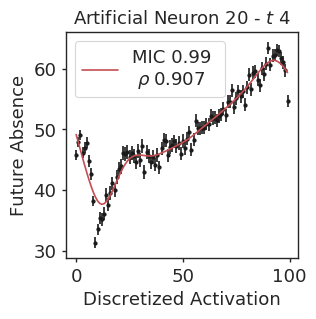

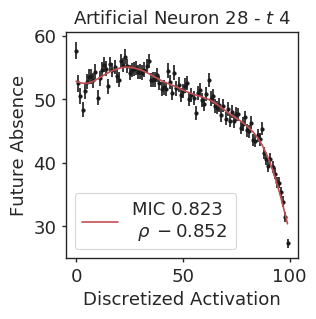

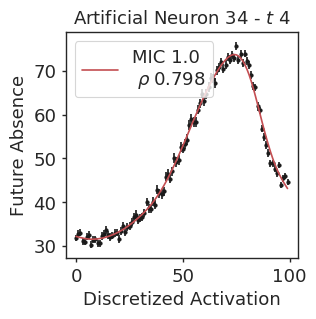

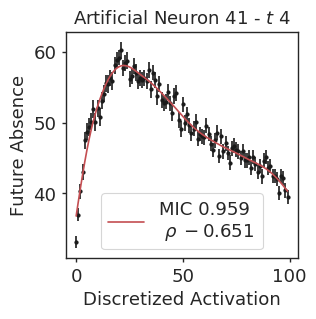

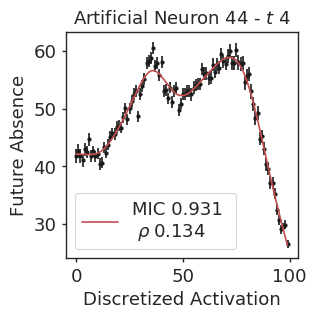

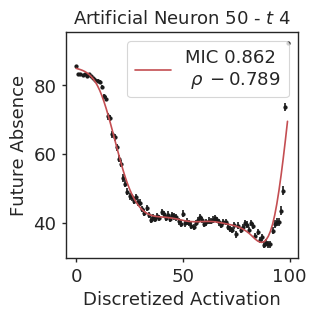

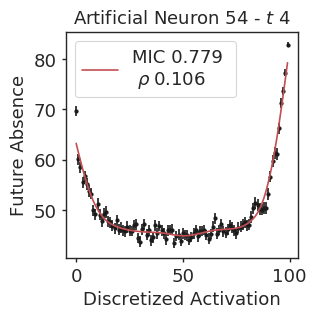

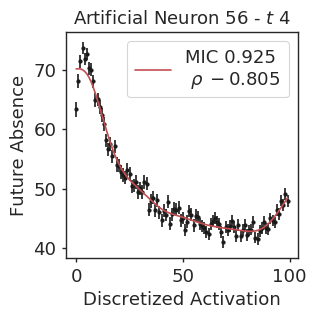

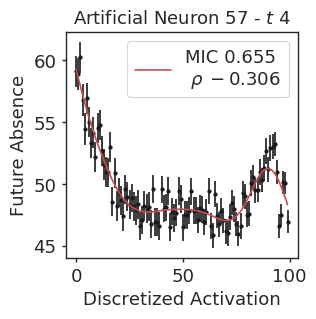

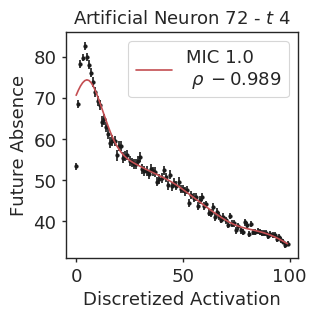

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 21 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 50 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarni

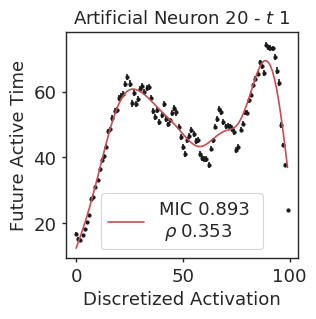

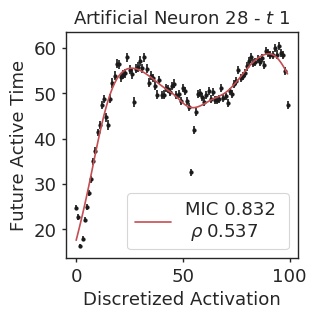

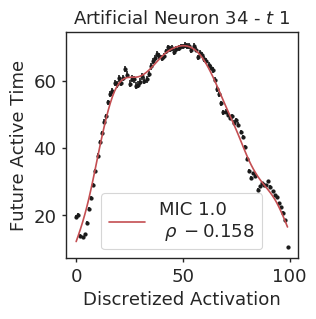

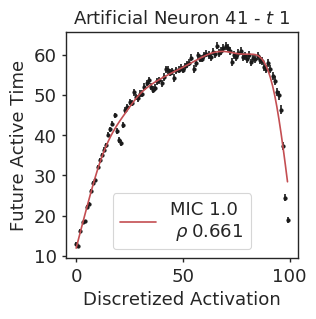

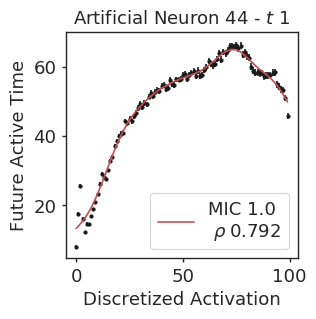

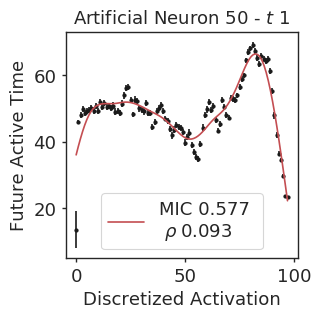

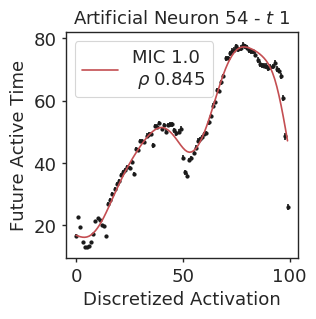

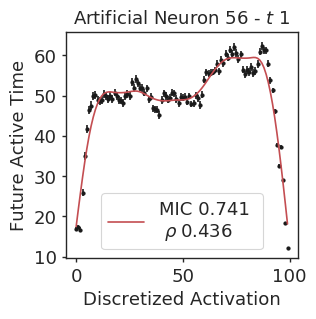

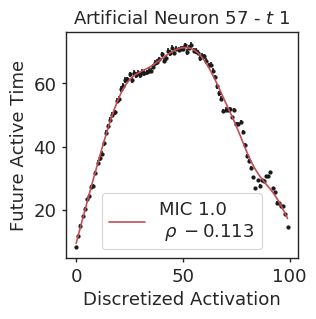

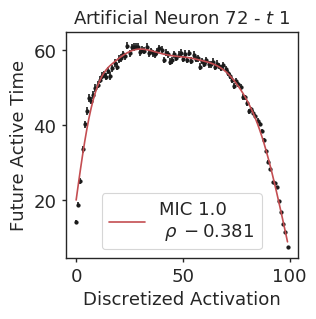

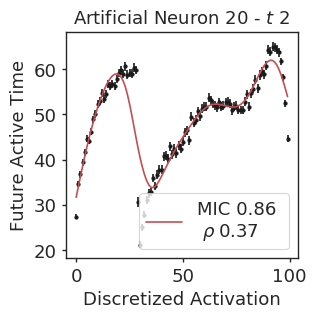

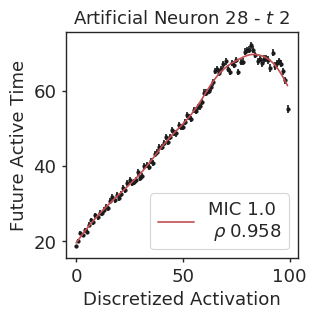

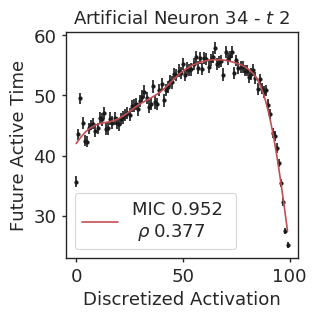

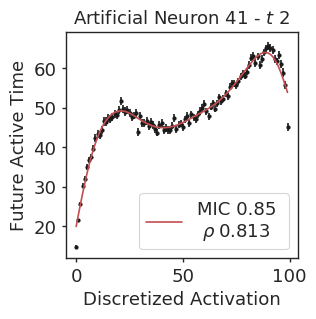

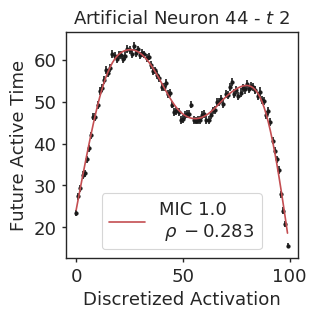

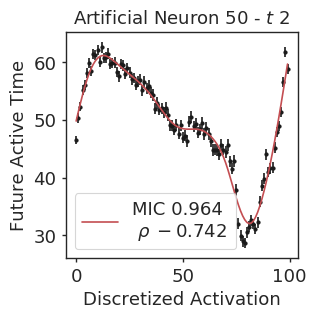

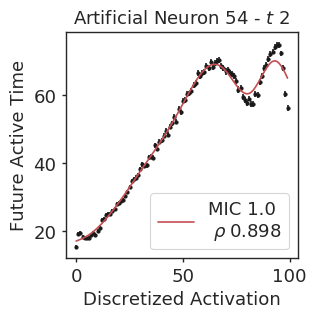

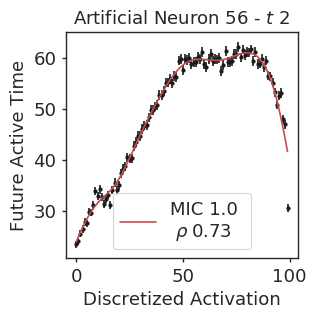

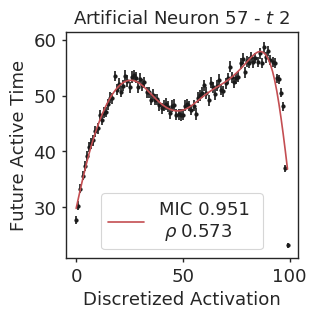

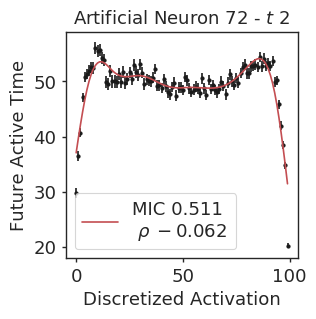

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


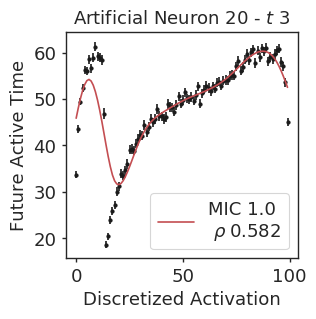

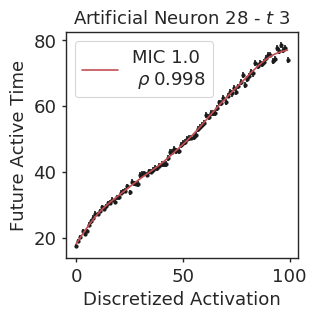

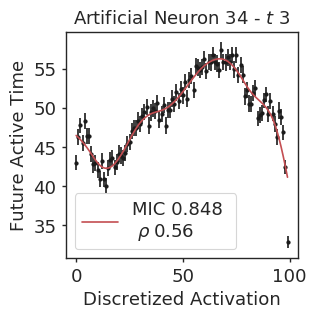

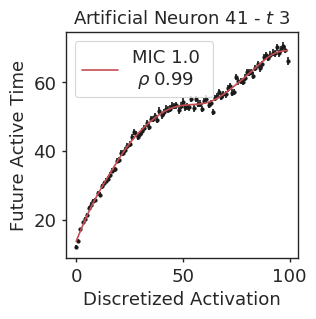

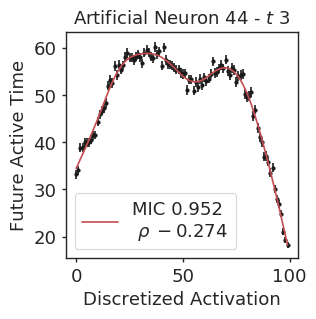

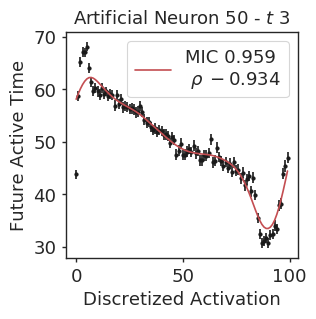

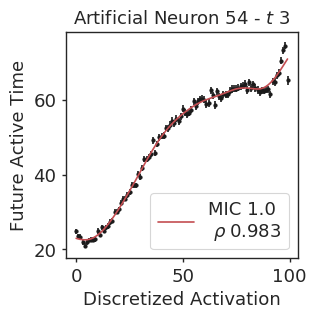

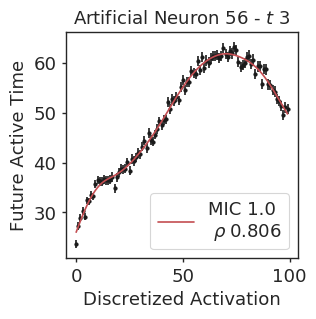

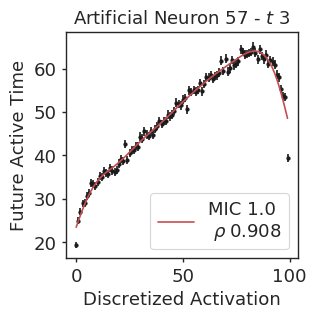

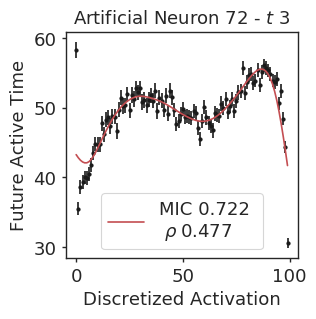

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


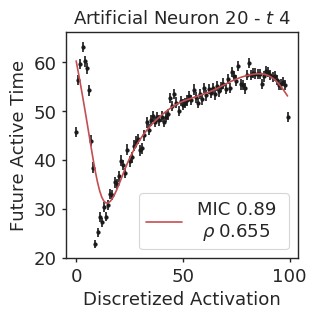

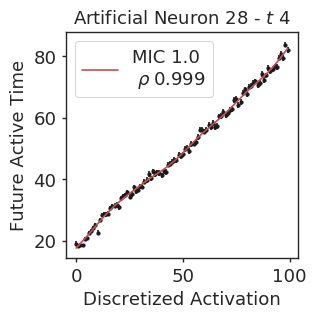

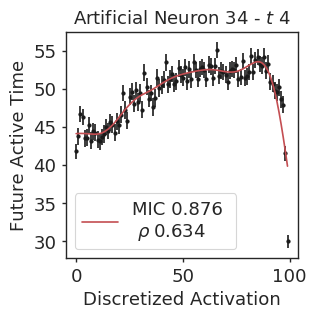

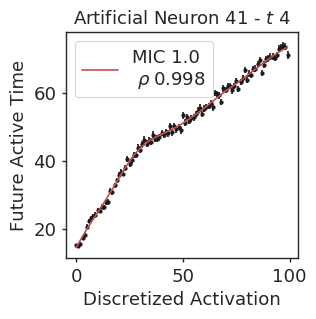

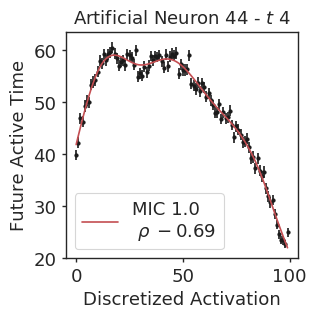

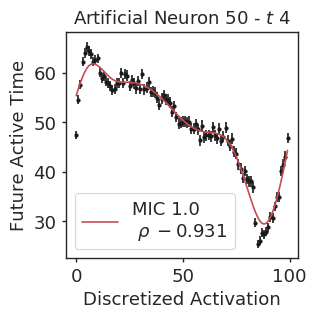

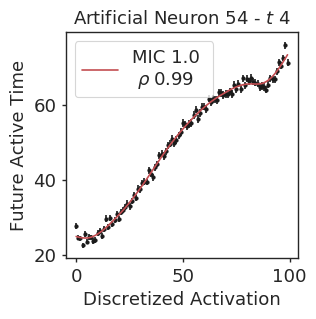

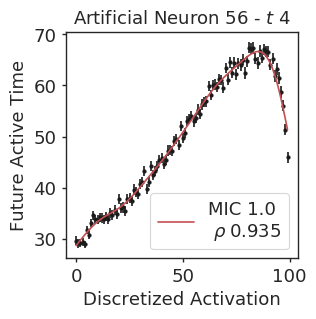

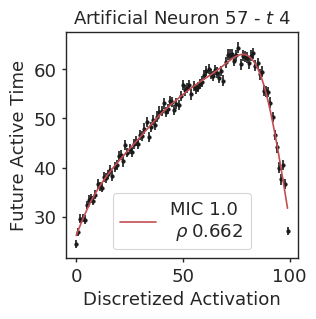

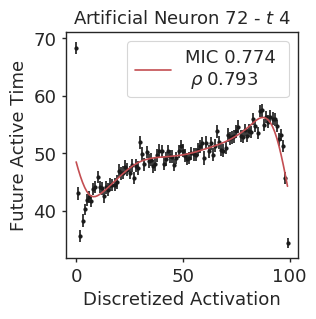

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 21 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 50 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarni

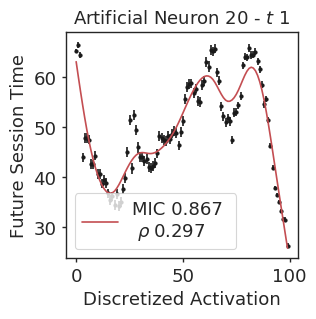

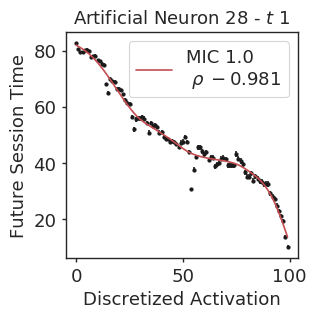

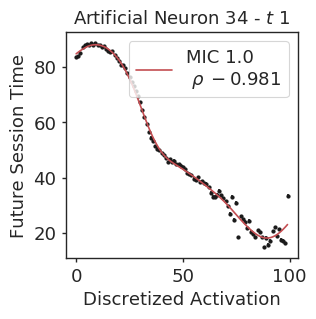

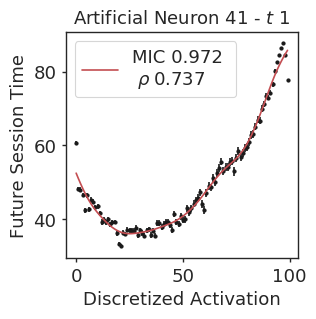

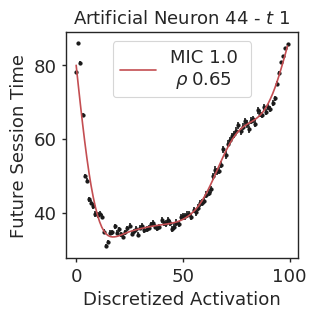

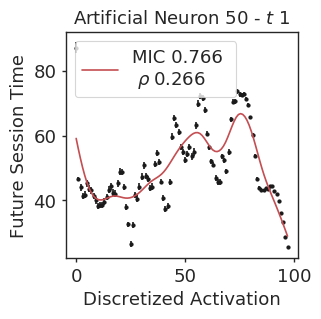

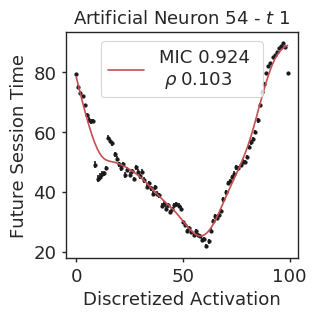

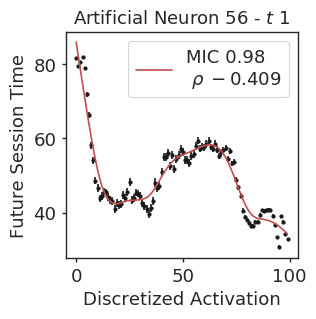

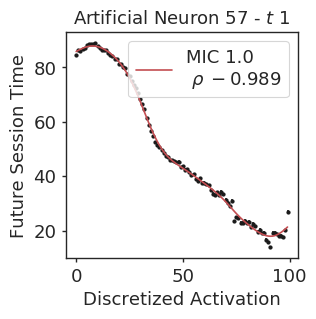

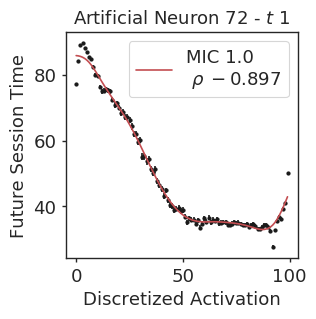

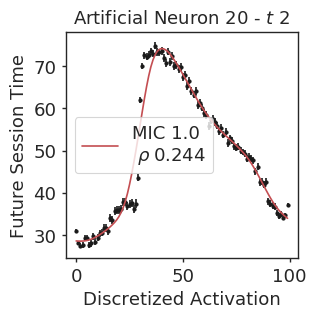

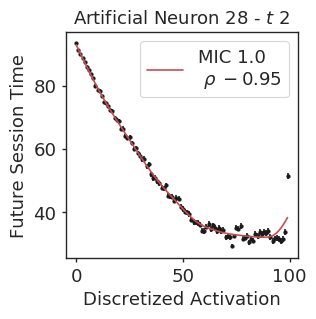

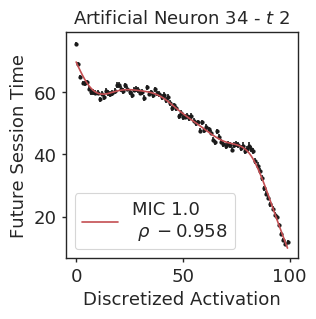

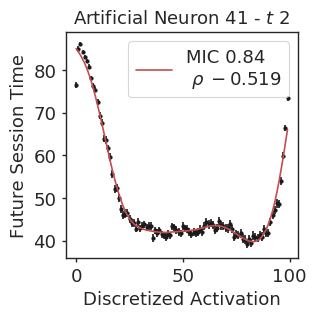

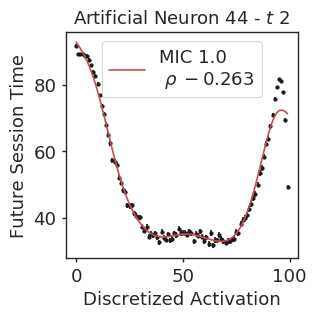

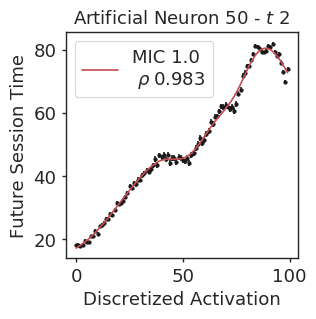

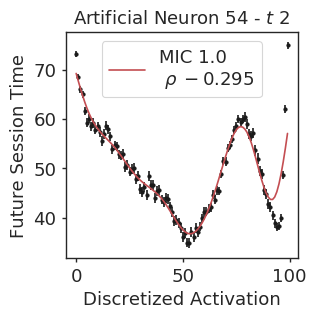

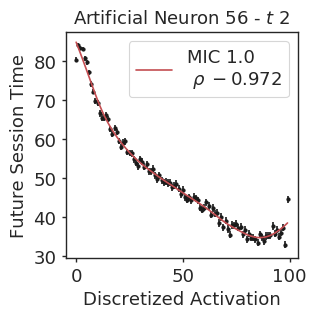

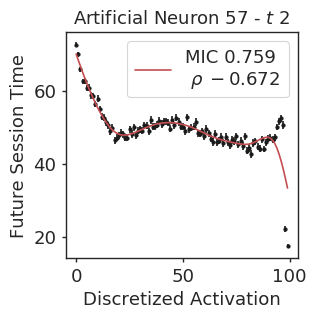

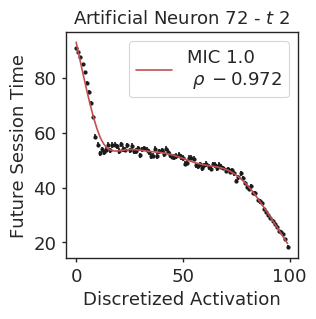

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


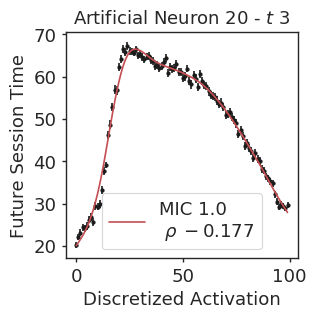

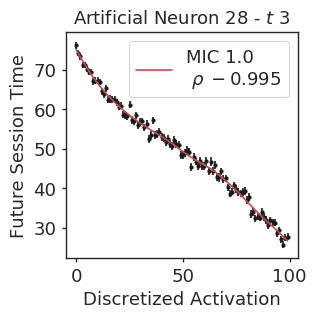

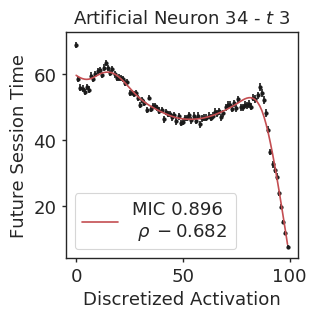

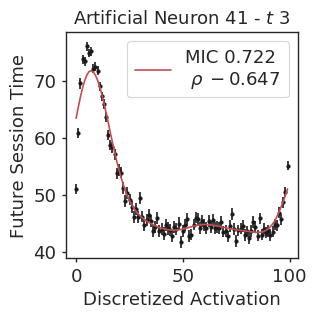

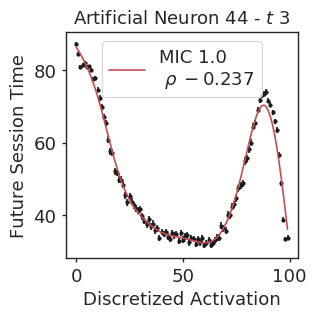

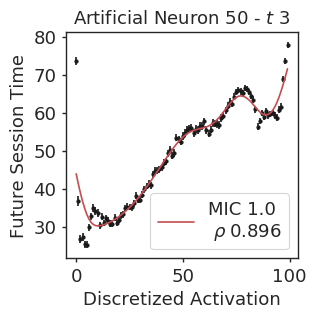

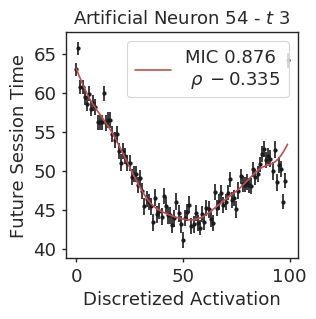

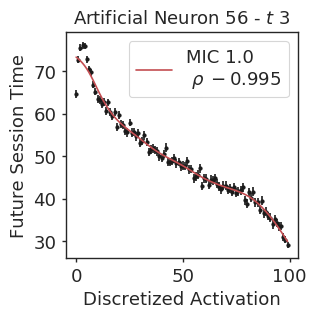

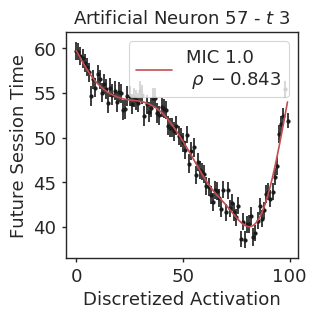

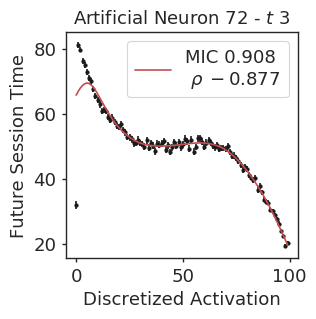

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


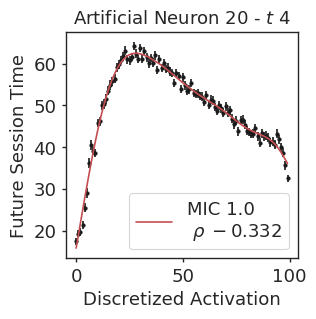

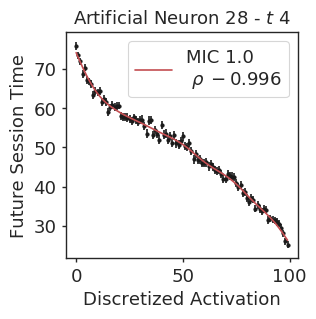

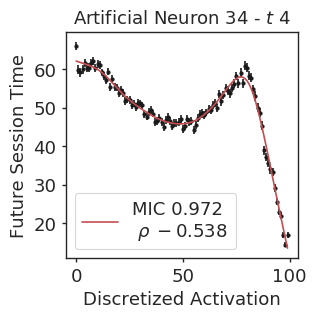

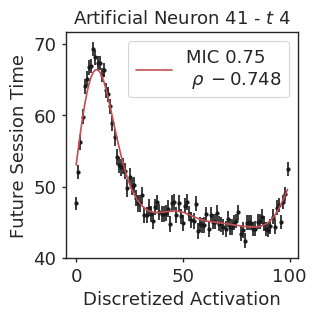

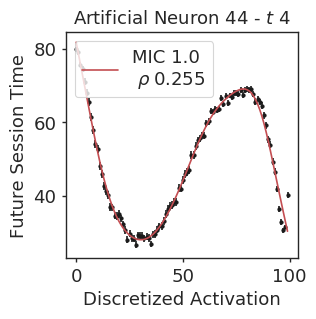

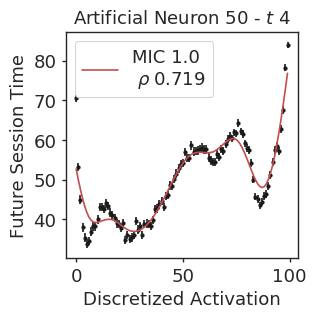

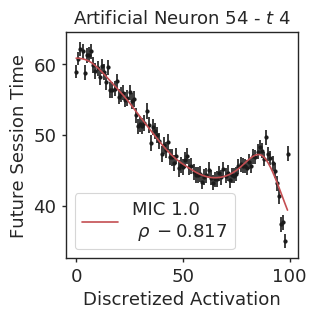

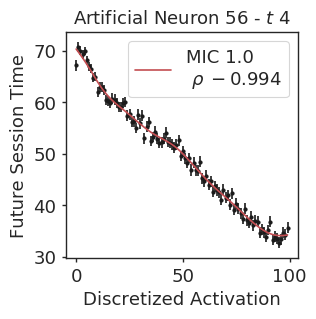

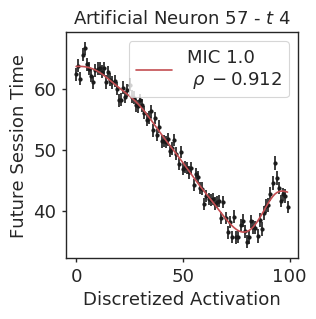

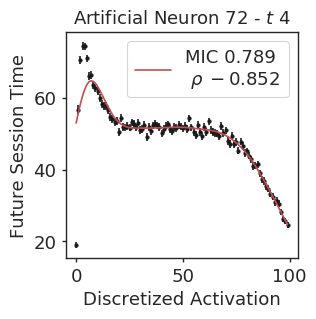

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 21 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 50 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarni

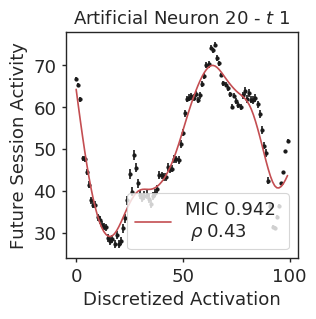

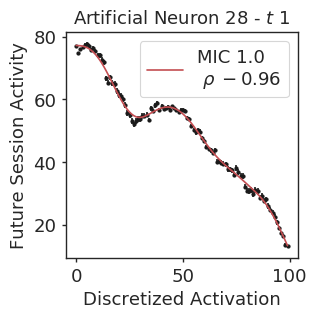

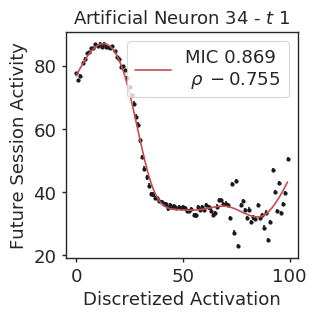

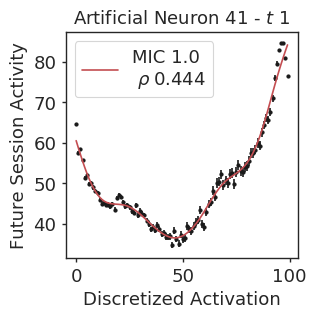

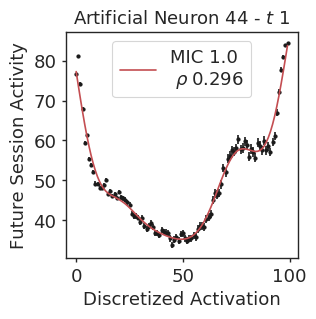

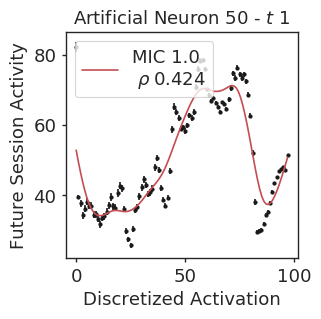

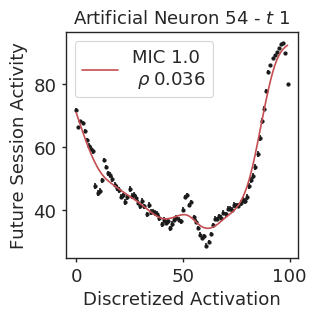

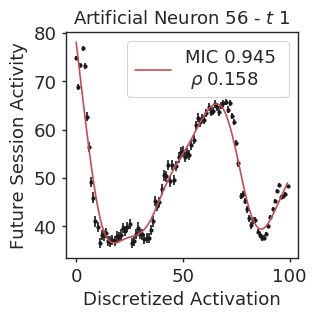

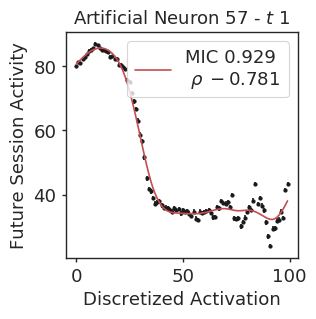

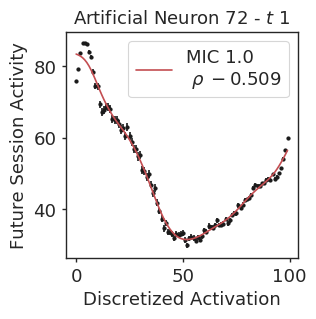

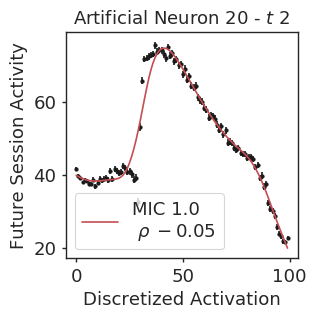

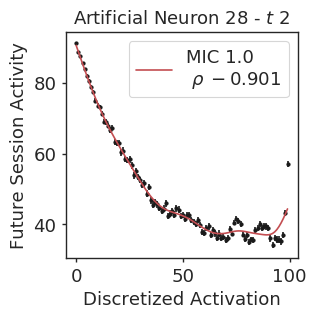

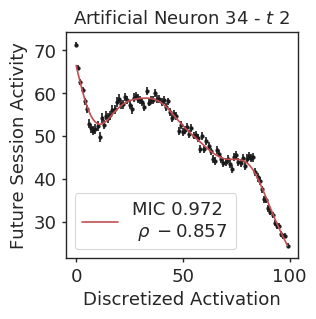

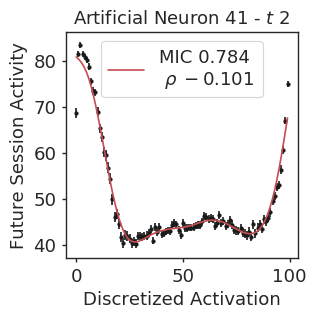

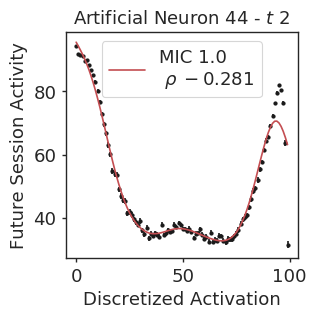

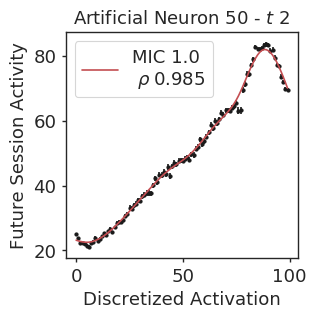

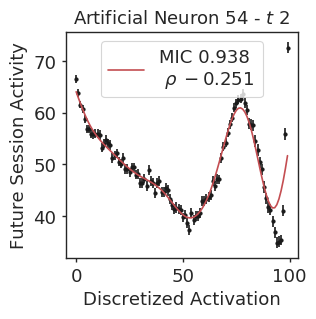

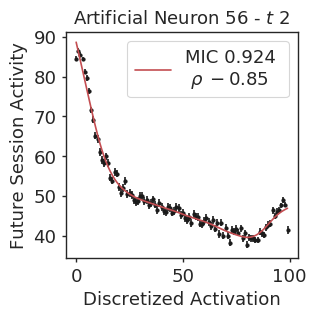

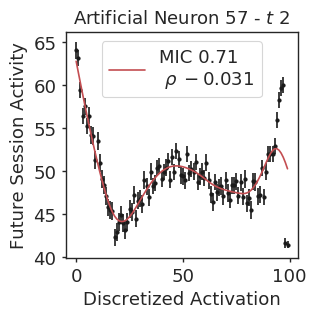

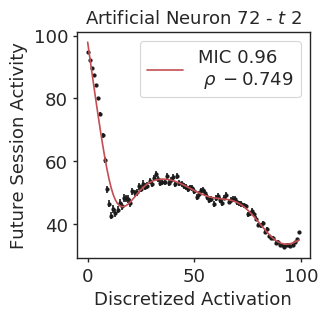

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


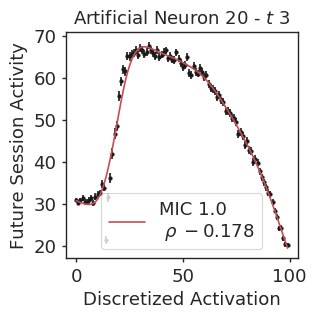

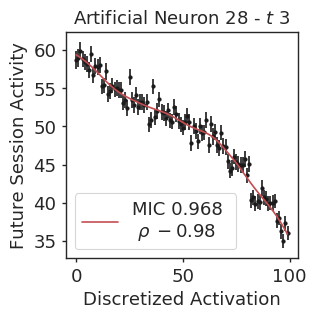

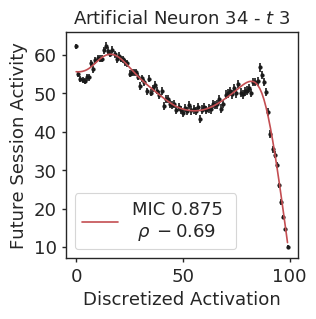

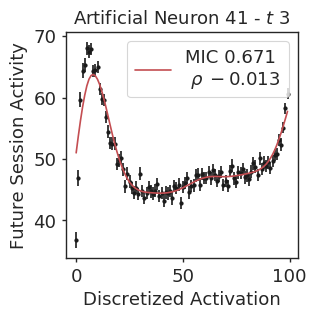

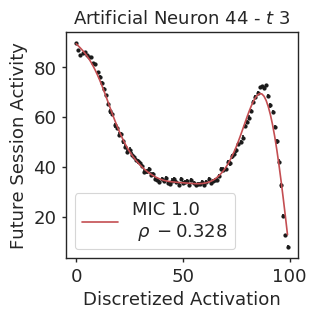

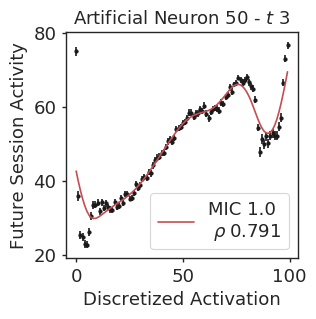

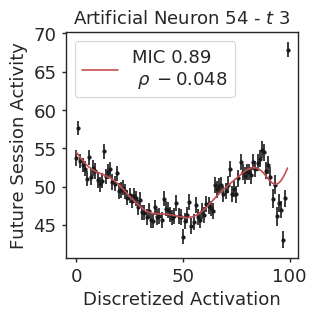

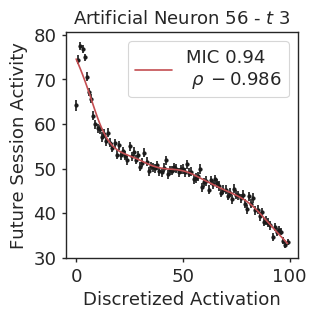

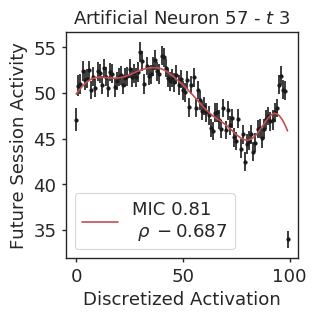

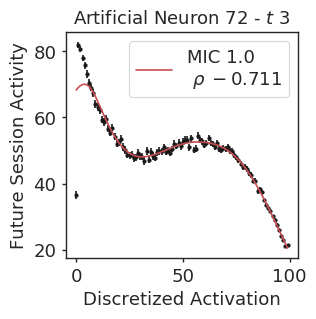

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 53 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 83 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


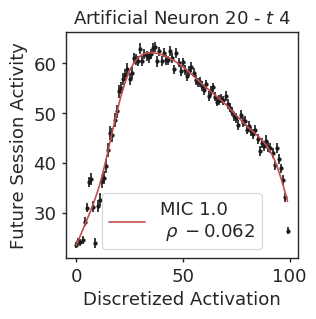

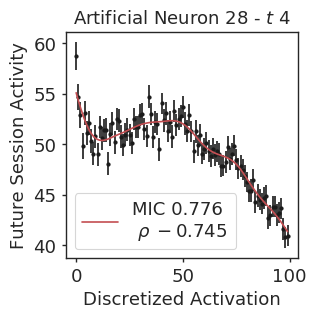

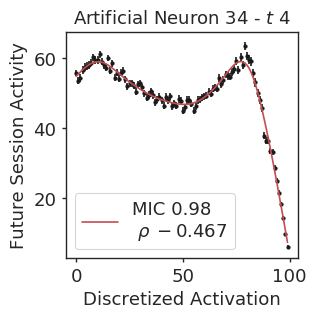

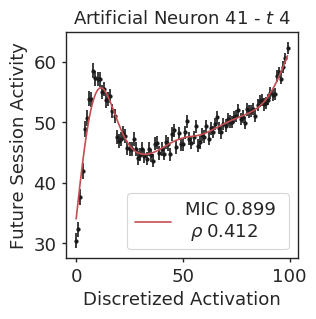

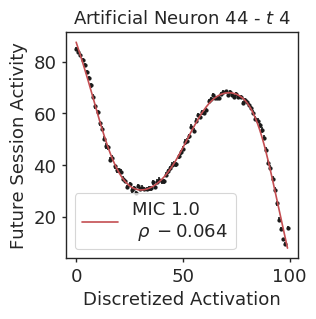

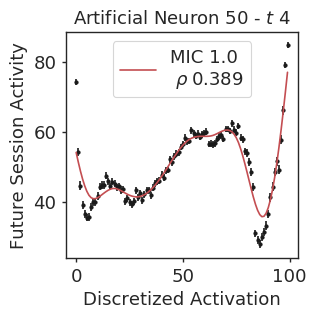

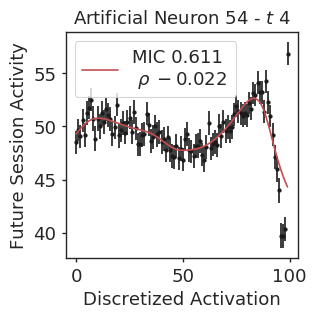

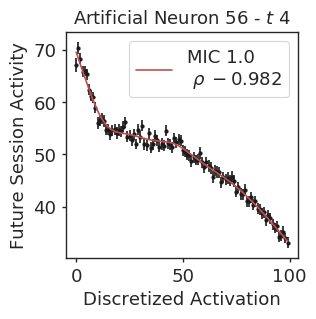

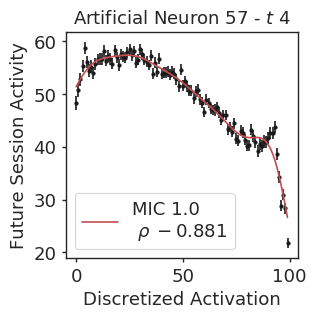

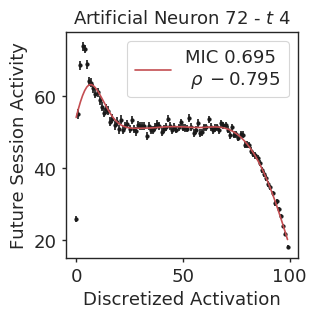

In [10]:
for metric in TARGETS:
    
    for column, snapshot in enumerate([0, 1, 2, 3]):

        temporal_context = data_container['context'][snapshot]
        temporal_embe = np.load(f'results\\saved_emb\\melchior_eng_emb_{snapshot}.npy')
        temporal_embe = temporal_embe[~np.isnan(temporal_embe).any(axis=1)]
    
        df = pd.DataFrame(temporal_embe)
        df['context'] = temporal_context
        df[metric] = data_container['prediction_ds'][metric][snapshot]
        df = df[df['context'] == 3]
        
        columns = list(df.drop([metric, 'context'], axis=1))
        color = group_wise_binning(
            array=df[metric].values,
            n_bins=100,
            grouper=df['context'].values,
            method='discret'
        )
        df[metric] = color

        columns = list(df.drop(['context', metric], axis=1))
        df[columns] = kbd(
            n_bins=100, 
            encode='ordinal',
        ).fit_transform(df[columns].values)
        
        melted = pd.melt(
            df, 
            id_vars=[metric, 'context'],
            var_name='Artificial Neurons',
            value_name='Signal'
        )
        
        visualize_neurons_function(
            data=melted, 
            metric=metric, 
            snapshot=snapshot+1,
            neurons=columns_to_keep,
            metric_rmp=TARGETS_RMP
        )